In [1]:
library(tidyverse)
library(pROC)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [2]:
#lasso_pred <- read.csv("../data/ATAC_predictions_on_all_samples_NEW/ATAC_pred_lasso_std_TRUE_gaussian_formatted_standardized.csv")
#lasso_pred <-  read.csv("../data/all_samples_train_ATAC_predictions_on_all_samples/all_samples_ATAC_pred_lasso_std_TRUE_formatted_standardized.csv")
lasso_pred <- read.csv("../data/all_samples_train_ATAC_predictions_on_all_samples/all_samples_ATAC_pred_lasso_std_TRUE_gaussian_trimmed_formatted_standardized.csv")
head(lasso_pred)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

sample,chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,...,chr9_39,chr9_391,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399
PGDX16568P,0.6953389,-0.7879755,0.6283735,-0.8076604,-0.4762342,-0.4843784,0.1574588,0.7738185,0.9266950,...,-0.26104774,0.53456169,-0.2882270,-0.7376411,0.3459933,-0.05068006,1.0490274,1.0220016,0.8971134,-1.1239397
PGDX16569P,0.6685276,-0.7808352,0.8278703,-1.0433986,-0.8732558,-0.5425936,-0.1108301,0.8073165,0.6771145,...,-0.86931628,0.54407024,-0.1319621,-0.3830047,0.1672065,-0.07010265,0.7165734,0.5450365,2.1032045,-0.1894466
PGDX16570P,0.3257788,-1.0488984,1.0016914,-0.9862307,-0.3133380,-0.7717212,-0.4113402,1.1532543,0.6261248,...,-1.02908360,-0.05235085,-0.2826165,-0.4314783,-0.6612242,0.03558009,0.7921805,0.1177460,1.2677444,-0.3231751
PGDX16571P,0.6735824,-1.0051706,0.5946802,-0.8331926,-0.6285969,-0.5744275,-0.3082262,0.7438386,0.4048773,...,-0.03035763,0.21872785,0.2970003,0.1060122,0.1146019,0.37187560,0.7845285,0.8089346,1.2953379,0.6134834
PGDX16579P,0.5463358,-1.0278642,0.7856385,-1.0208457,-1.3634272,-0.6691807,-0.1297193,0.2580991,0.3741107,...,-0.11768120,0.01472267,-0.1548552,-0.6424580,-0.6951410,0.02006348,1.2604557,1.1036514,0.8842823,-0.4777681
PGDX16580P,0.6874442,-0.9024875,0.8600207,-1.2188743,-0.7686111,-0.7730980,-0.2695628,0.8137366,0.4154834,...,-0.84386310,0.32829360,0.2397903,-0.5690418,0.1624912,0.55272815,1.0007847,0.5013539,1.8067929,-0.4536265


In [3]:
sample_types <- read.table("../data/sample_types.txt", header = F, sep = " ")
colnames(sample_types) <- c("sample", "sample_type")
head(sample_types)

sample,sample_type
PGDX10344P1,Gastric_cancer
PGDX10346P1,Gastric_cancer
PGDX10349P1,Gastric_cancer
PGDX10351P1,Gastric_cancer
PGDX10566P,Ovarian_Cancer
PGDX10567P,Ovarian_Cancer


In [4]:
data <- merge(lasso_pred, sample_types, by="sample")
data <- data %>% mutate(sample_type01 = ifelse(sample_type == "Healthy", 0, 1))
head(data)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

sample,chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,...,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399,sample_type,sample_type01
PGDX10344P1,0.30947556,-0.7539309,1.1516740,-0.73103587,-0.2853468,-0.7798561,0.06051166,0.2748797,0.1194668,...,0.1650859,-0.42256897,-0.2957827,0.01479394,0.50865533,-0.6555403,1.3079180,-0.16053665,Gastric_cancer,1
PGDX10346P1,1.31264238,-0.8638002,1.0312299,-0.65368812,-0.7419347,-0.4319792,-0.05947708,0.7711896,0.3962822,...,-0.5444958,-0.64879239,0.2428516,0.19974982,1.12004644,0.7947682,0.3184796,-0.51734387,Gastric_cancer,1
PGDX10349P1,0.03454358,-1.0286147,0.3685958,-1.12662266,-0.8042189,-0.9181945,-0.15124313,0.5120651,2.2926807,...,0.5371412,-0.12744117,0.4225526,0.15168523,0.94030365,0.5442199,1.6525958,0.01383398,Gastric_cancer,1
PGDX10351P1,1.25220761,-1.3596647,0.4615063,-1.20750208,-0.7935835,-0.2823848,-0.37592036,0.9370712,0.5484292,...,0.8356236,0.02982247,0.6091440,0.02092330,1.02896111,0.3744232,1.3586522,-0.20452260,Gastric_cancer,1
PGDX10566P,0.42060193,-1.0139996,1.1073594,-0.97364296,-0.5256145,-0.7092296,-0.23406615,0.8072512,0.6548251,...,0.2332540,-0.79614677,0.3238098,-0.20121012,0.03054838,0.4624885,1.2128934,-0.41948429,Ovarian_Cancer,1
PGDX10567P,0.94804965,-0.7293273,1.1532942,-0.05731926,-0.7344479,-0.8104326,0.10587807,0.6343644,0.7289408,...,-0.2284586,-0.88340246,0.3731070,0.16567934,0.18048909,0.2987154,1.8230905,-0.66497791,Ovarian_Cancer,1


In [5]:
data <- data %>% select(-sample_type)

In [6]:
data <- data %>% select(-sample)
head(data)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

chr10_400,chr10_40,chr10_4,chr10_401,chr10_402,chr10_403,chr10_404,chr10_405,chr10_406,chr10_407,...,chr9_391,chr9_392,chr9_393,chr9_394,chr9_395,chr9_396,chr9_397,chr9_398,chr9_399,sample_type01
0.30947556,-0.7539309,1.1516740,-0.73103587,-0.2853468,-0.7798561,0.06051166,0.2748797,0.1194668,1.58616357,...,-0.37970698,0.1650859,-0.42256897,-0.2957827,0.01479394,0.50865533,-0.6555403,1.3079180,-0.16053665,1
1.31264238,-0.8638002,1.0312299,-0.65368812,-0.7419347,-0.4319792,-0.05947708,0.7711896,0.3962822,-0.01456208,...,-0.25048611,-0.5444958,-0.64879239,0.2428516,0.19974982,1.12004644,0.7947682,0.3184796,-0.51734387,1
0.03454358,-1.0286147,0.3685958,-1.12662266,-0.8042189,-0.9181945,-0.15124313,0.5120651,2.2926807,1.33510514,...,1.32998993,0.5371412,-0.12744117,0.4225526,0.15168523,0.94030365,0.5442199,1.6525958,0.01383398,1
1.25220761,-1.3596647,0.4615063,-1.20750208,-0.7935835,-0.2823848,-0.37592036,0.9370712,0.5484292,0.93190924,...,0.51918961,0.8356236,0.02982247,0.6091440,0.02092330,1.02896111,0.3744232,1.3586522,-0.20452260,1
0.42060193,-1.0139996,1.1073594,-0.97364296,-0.5256145,-0.7092296,-0.23406615,0.8072512,0.6548251,0.87415924,...,0.03396167,0.2332540,-0.79614677,0.3238098,-0.20121012,0.03054838,0.4624885,1.2128934,-0.41948429,1
0.94804965,-0.7293273,1.1532942,-0.05731926,-0.7344479,-0.8104326,0.10587807,0.6343644,0.7289408,0.45120878,...,0.61736424,-0.2284586,-0.88340246,0.3731070,0.16567934,0.18048909,0.2987154,1.8230905,-0.66497791,1


In [7]:
cross_validation <- function(dataset, k=10){
  set.seed(0)
  cvfolds <- cut(seq_len(nrow(dataset)), breaks = k, labels = F)
  cvfolds <- sample(cvfolds)
  
  observed  <- dataset$sample_type01
  predicted <- rep(NA, nrow(dataset))

  
  for (i in 1:k){
    rows      <- which(cvfolds==i)
    testdata  <- dataset[rows,]
    testdata <- testdata %>% select(-sample_type01)
    traindata <- dataset[-rows,]
    fit       <- glm(sample_type01 ~ . , data = traindata, family=binomial(link='logit')) 
    tmp       <- as.data.frame(predict(fit, newdata = testdata, type = "response"))
    colnames(tmp) <- c("probability")
    #tmp <- tmp %>% mutate(response = ifelse(probability > 0.5,1, 0))
    
    predicted[rows] <- tmp$probability
  }
  
  #auc_result <- auc(observed, predicted)

    results <- cbind(observed, predicted)

  return(results)
}

In [8]:
results <- as.data.frame(cross_validation(data, 10))


Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”Warning message

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


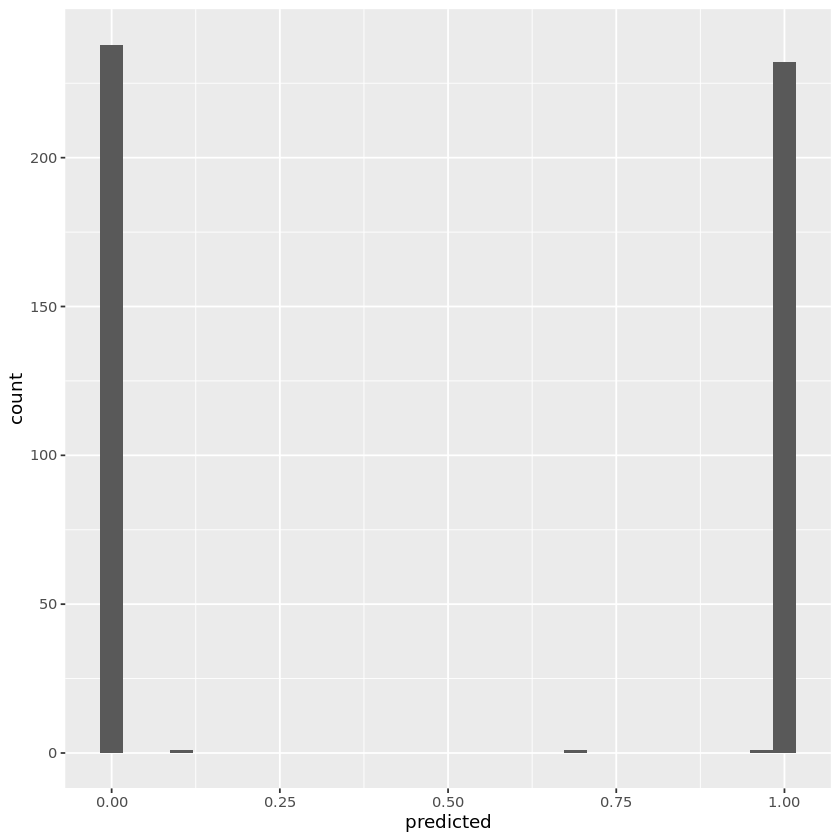

In [9]:
ggplot(data = results)+
geom_histogram(aes(x = predicted))

In [10]:
(results)

observed,predicted
1,2.220446e-16
1,1.000000e+00
1,1.000000e+00
1,1.000000e+00
1,1.000000e+00
1,2.220446e-16
1,2.220446e-16
1,1.000000e+00
1,1.000000e+00
1,1.000000e+00


In [11]:
roc.plot <- roc(results$observed, results$predicted)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


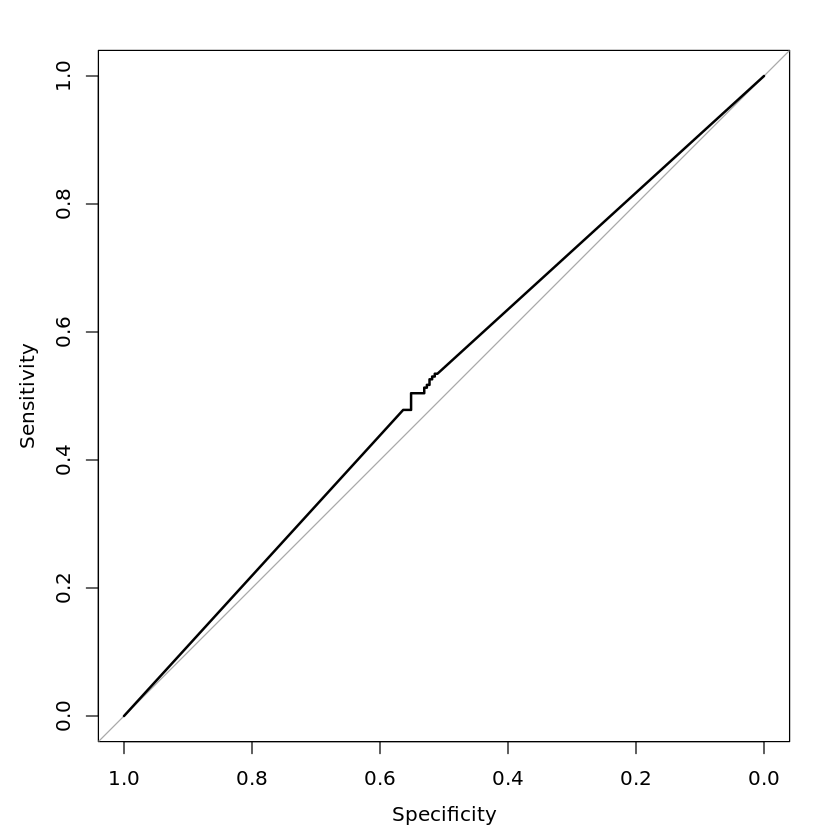

In [12]:
plot(roc.plot)

In [13]:
auc(roc.plot)

Area under the curve: 0.523